In [56]:
import os
import datetime
from astropy import units as u

import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

import pandas as pd
pd.set_option("display.max_columns", None)

ZMAG = 25.0
ITIME = 60.0 * u.second

DATA_DIR = "/home/ramon/uanl/Tesis/Backup Data/Iturbide Aviles"

In [74]:
df = pd.DataFrame()
for dataFile in [f for f in os.listdir(DATA_DIR) if '.dat' in f]:
    data = pd.read_csv(os.path.join(DATA_DIR, dataFile), sep='\t', names=['julianDate', 'mag', 'unknown'])
    data.drop(columns=['unknown'], inplace=True)
    data['julianDate'] += 2459000
    df = pd.concat([df, data], ignore_index=True)

df.sort_values(by=['julianDate'], ignore_index=True, inplace=True)
df

,julianDate,mag
0,2.459876e+06,17.040
1,2.459876e+06,17.123
2,2.459876e+06,17.142
3,2.459876e+06,17.221
4,2.459876e+06,17.060
...,...,...
545,2.459890e+06,17.308
546,2.459890e+06,17.286
547,2.459890e+06,17.387
548,2.459890e+06,17.318


In [75]:
import numpy as np

df['flux'] = ITIME * 10**((2/5)*(ZMAG - df['mag']))
df['normFlux'] = df['flux'] / np.median(df['flux'])
df

,julianDate,mag,flux,normFlux
0,2.459876e+06,17.040,91653.963494,1.050025
1,2.459876e+06,17.123,84908.515976,0.972747
2,2.459876e+06,17.142,83435.572528,0.955872
3,2.459876e+06,17.221,77580.263508,0.888791
4,2.459876e+06,17.060,89981.090130,1.030860
...,...,...,...,...
545,2.459890e+06,17.308,71606.302753,0.820351
546,2.459890e+06,17.286,73072.043093,0.837143
547,2.459890e+06,17.387,66581.143606,0.762781
548,2.459890e+06,17.318,70949.812223,0.812830


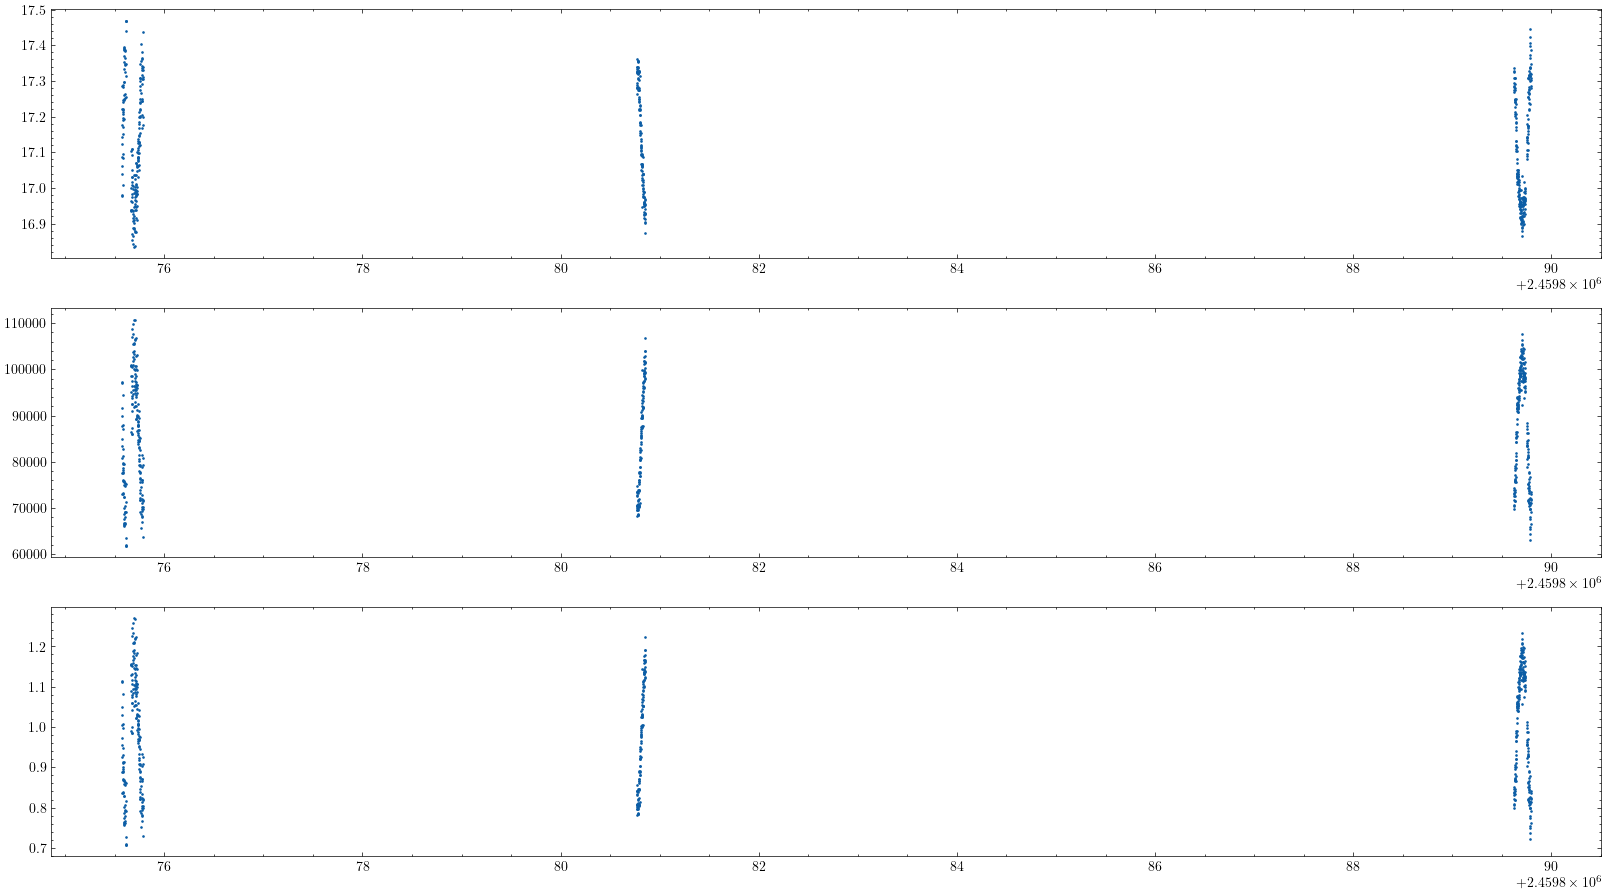

In [76]:
fig, axs = plt.subplots(3, 1, figsize=(20, 11))
axs[0].scatter(df['julianDate'], df['mag'], s=0.8)
axs[1].scatter(df['julianDate'], df['flux'], s=0.8)
axs[2].scatter(df['julianDate'], df['normFlux'], s=0.8)

In [73]:
df.to_csv(os.path.join(DATA_DIR, "aviles-differential-flux.csv"), index=False)